# Exploratory Data Analysis

Sau khi hoàn thành phần tiền xử lí dữ liệu, dữ liệu đã được làm sạch giúp ta trả lời một số câu hỏi chính xác và rõ ràng hơn.  
##### Đầu tiên, import các thư viện cần thiết

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### Load data

In [112]:
steam_df = pd.read_csv('processed_data.csv')
steam_df.head()

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,Rating
0,Endless Monday: Dreams and Deadlines,0,0,hcnone,hcnone,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0.931514
1,Papa's Freezeria Deluxe,0,0,Flipline Studios,Flipline Studios,6514,6562,48,87500.0,2023,...,0,0,1,0,0,1,0,0,0,0.957730
2,Cats Hidden in Jingle Jam,0,0,Travellin Cats,Travellin Cats,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.959760
3,An Arcade Full of Cats,1,0,Devcats,Devcats,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.947230
4,Ib,0,0,kouri,PLAYISM,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0.946714


### Câu hỏi 1: Nhà phát triển game nào có tiềm năng phát triển nhất?
Để trả lời câu hỏi này trước tiên ta sẽ xem xét có bao nhiêu nhà phát triển trong bộ dữ liệu.   
Sau đó chọn ra các nhà phát triển có các game ở mức rating cao và xem xét các game từ trước đến hiện tại của các developer đó và vẽ biểu đồ thể hiện xu hướng.

Xem xét các developer:

In [113]:
dev_df = steam_df['Developer'].value_counts()

# Number of dev
len(dev_df)

2118

Có khá nhiều Developer, để dễ dàng quan sát và phân tích ta chỉ xét các nhà phát triển gần đây, cụ thể từ **01/2013** đến nay. 

Sau đó lấy top 5 nhà phát triển đã phát triển được nhiều game nhất để phân tích.

In [114]:
# Release date from 2013-01
steam_df = steam_df[(steam_df['ReleaseYear'] >= 2013)]

# Top 10 Developer
top5_dev_df = steam_df['Developer'].value_counts().nlargest(5)
top5_dev_df = steam_df[steam_df['Developer'].isin(top5_dev_df.index)][['Developer', 'Title', 'ReleaseYear', 'ReleaseMonth', 'Rating']]

top5_dev_df['ReleaseYear'] = top5_dev_df['ReleaseYear'].astype(str)
top5_dev_df['ReleaseMonth'] = top5_dev_df['ReleaseMonth'].astype(str)

# Combine 'year' and 'month' and convert to datetime
top5_dev_df['ReleaseYM'] = pd.to_datetime(top5_dev_df['ReleaseYear'] + top5_dev_df['ReleaseMonth'], format='%Y%m').dt.strftime('%Y-%m').values

top5_dev_df.drop(['ReleaseYear', 'ReleaseMonth'], axis=1, inplace=True)
top5_dev_df

,Developer,Title,Rating,ReleaseYM
83,"Jackbox Games, Inc.",The Jackbox Party Pack 3,0.935710,2016-10
95,"Jackbox Games, Inc.",The Jackbox Party Pack 7,0.930680,2020-10
308,"Jackbox Games, Inc.",The Jackbox Party Pack 6,0.911358,2019-10
321,Square Enix,PARANORMASIGHT: The Seven Mysteries of Honjo,0.910002,2023-03
340,"Jackbox Games, Inc.",The Jackbox Party Pack 2,0.910763,2015-10
...,...,...,...,...
2551,Chilla's Art,[Chilla's Art] Night Delivery | 例外配達,0.768738,2021-06
2581,Chilla's Art,[Chilla's Art] The Caregiver | 終焉介護,0.760874,2021-04
2670,Chilla's Art,[Chilla's Art] The Ghost Train | 幽霊列車,0.753257,2020-07
2675,Chilla's Art,[Chilla's Art] Inunaki Tunnel | 犬鳴トンネル,0.749736,2019-11


Sau đó group các game chung Developer bằng **groupby** và lưu vào DataFrameGroupBy `grouped_df`.

In [115]:
grouped_df = top5_dev_df.groupby('Developer')
grouped_df

Vẽ biểu đồ **line chart** thể hiện xu hướng của top 10 Developer:
- Lấy ra group mỗi Developer.
- Sử dụng **sort_values** để sắp xếp thứ tự ngày phát hành game.

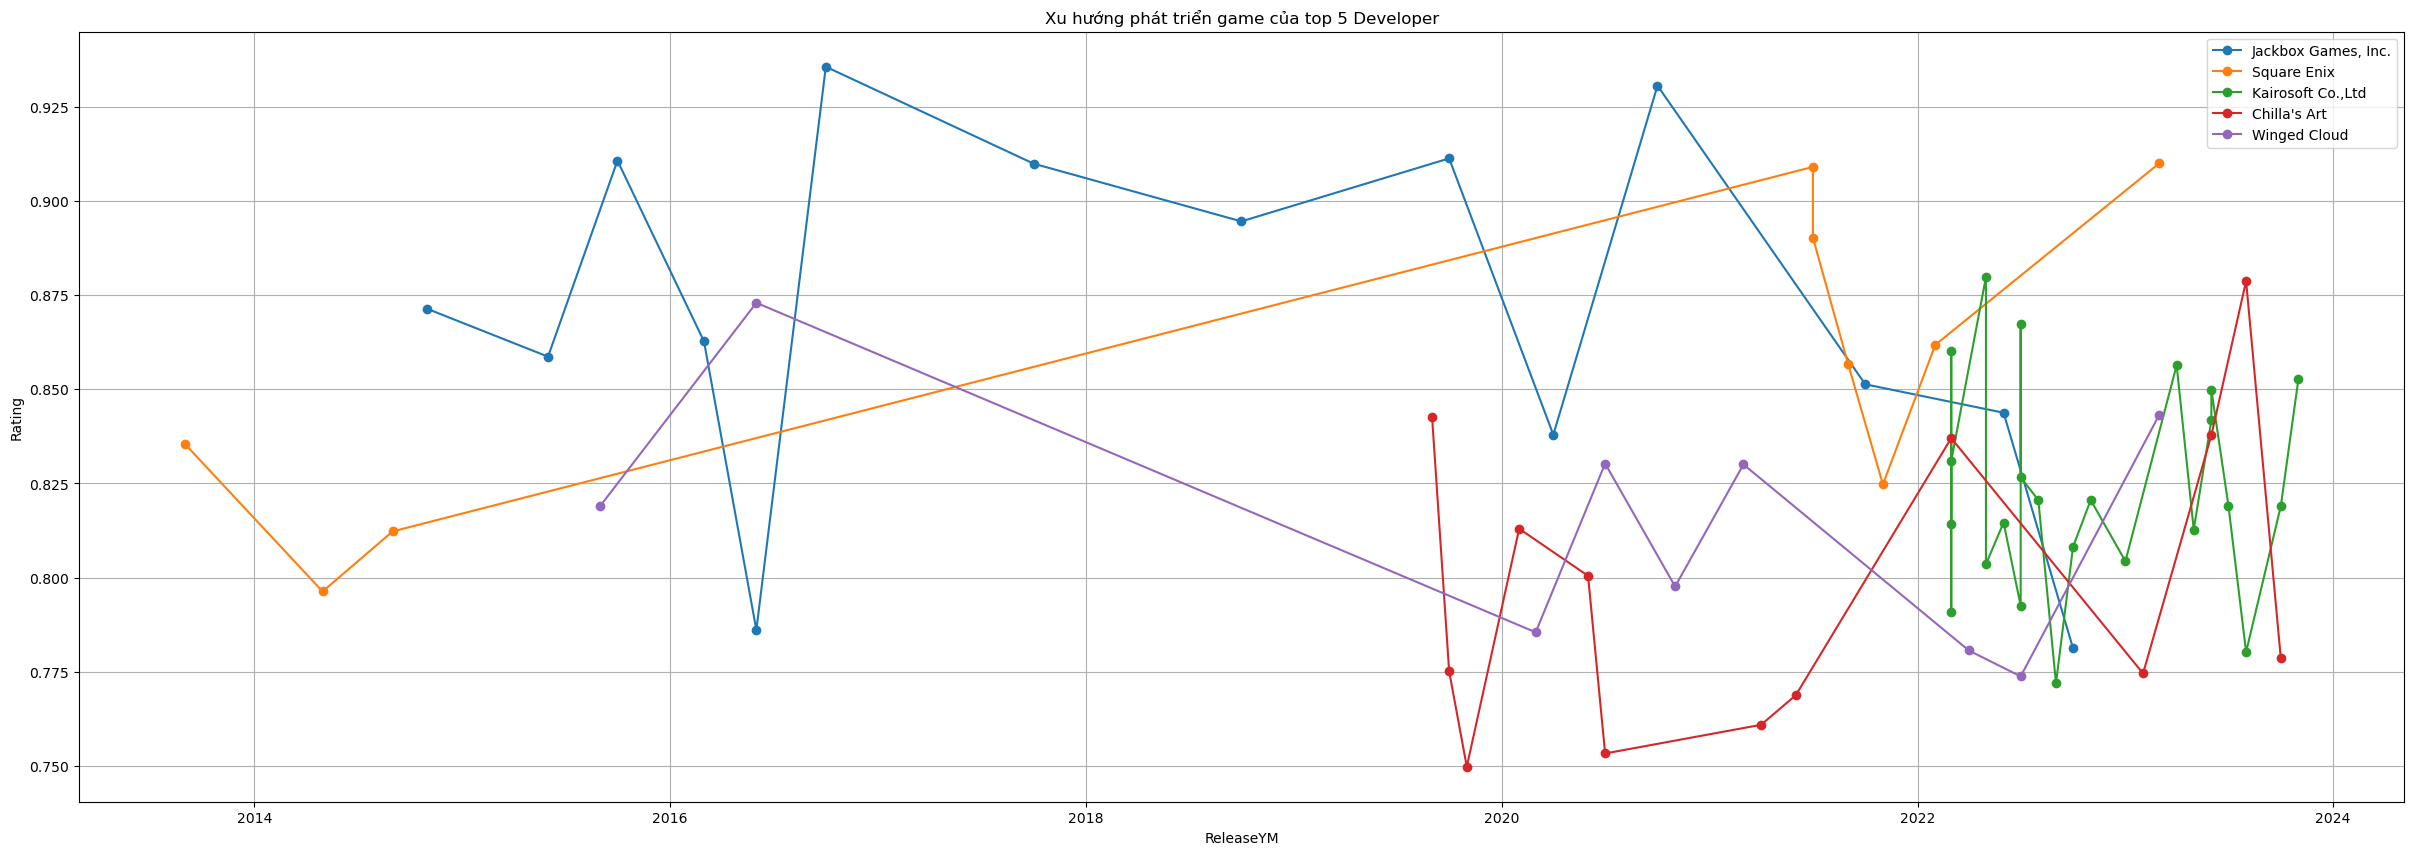

In [116]:
# List 10 developer's names
developer_names = list(top5_dev_df['Developer'].unique())
developer_names

list_date = top5_dev_df['ReleaseYM'].sort_values().unique()
list_date
# Convert list_date to DataFrame
list_date_df = pd.DataFrame(list_date, columns=['ReleaseYM'])

# Plot chart
plt.figure(figsize=(30,10))

for i in range(5):
    dev_df = grouped_df.get_group(developer_names[i]).sort_values(by=['ReleaseYM'])
    
    # Merge list_date_df and dev_df
    merged_df = pd.merge(list_date_df, dev_df, on='ReleaseYM', how='left')

    # Fill missing values with None
    merged_df['Rating'].fillna(value=np.nan, inplace=True)

    # Ensure 'ReleaseYM' is in datetime format
    merged_df['ReleaseYM'] = pd.to_datetime(merged_df['ReleaseYM'])

    mask = np.isfinite(merged_df['Rating'])
    plt.plot(merged_df['ReleaseYM'][mask], merged_df['Rating'][mask], linestyle='-', marker='o', label=developer_names[i])

plt.title("Xu hướng phát triển game của top 5 Developer")
plt.xlabel("ReleaseYM")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()